##  **Data analysis using Python Project-Blinkit analysis**



#### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Import Raw Data**

In [5]:
df=pd.read_csv("C:/Users/Anshul/Desktop/blinkit/blinkit_data.csv")

#### **Sample Data**

In [9]:
df.head(10)


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


#### **Size of Data**

In [13]:
print("Size of data is: ", df.shape)

Size of data is:  (8523, 12)


#### **Data types**

In [14]:
df.dtypes


Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

#### **Data cleaning**

In [15]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [20]:
df['Item Fat Content']=df['Item Fat Content'].replace({'low fat':'Low Fat',
                                                       'LF': 'Low Fat',
                                                       'reg':'Regular'})



In [21]:

print(df['Item Fat Content'].unique())


['Regular' 'Low Fat']


## **Business Requirements**

### **Key Performance Indicators(KPI'S)**

In [34]:
#Total sales
total_sales=df['Sales'].sum()

#Average Sales
avg_sales=df['Sales'].mean()

#No of items Sold
no_of_items_sold=df['Sales'].count()

#Average Ratings
avg_ratings=df['Rating'].mean()

#Display
print(f"Total Sales:${total_sales: ,.1f}")
print(f"Average Sales:${avg_sales: ,.1f}")
print(f"No of items sold:${no_of_items_sold: ,.1f}")
print(f"Average Ratings:${avg_ratings: ,.1f}")


Total Sales:$ 1,201,681.5
Average Sales:$ 141.0
No of items sold:$ 8,523.0
Average Ratings:$ 4.0


## **Charts Requirements**

#### **Total Sales By fat content**

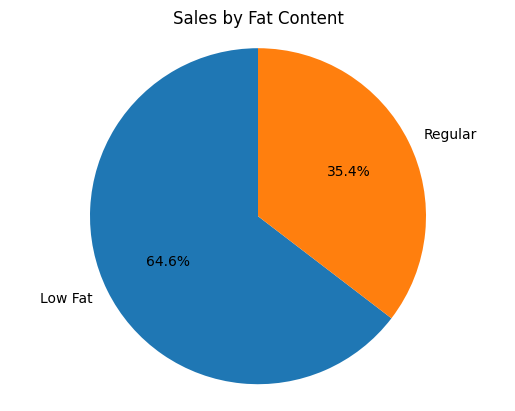

In [35]:
sales_by_fat=df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat,labels=sales_by_fat.index,
        autopct='%.1f%%',
        startangle=90)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

**The majority of sales (64.6%) come from Low Fat items, indicating a clear consumer preference for healthier options.Regular Fat items account for only 35.4% of total sales.This trend highlights a potential shift in customer buying behavior toward low-fat or health-conscious products.
Blinkit could consider expanding its low-fat product line to further capitalize on this demand.**

#### **Total Sales By item type**

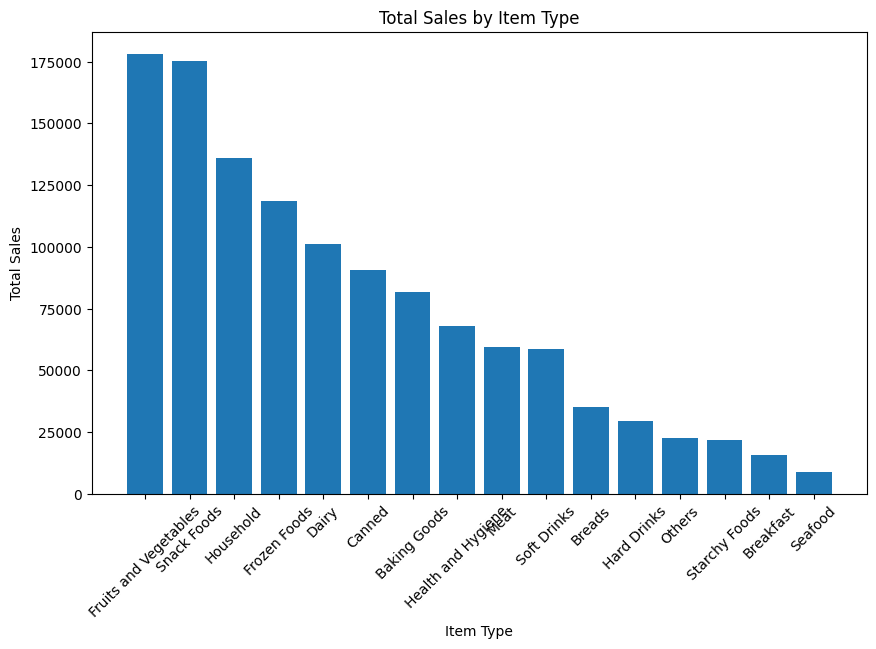

In [40]:
sales_by_type= df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bars= plt.bar(sales_by_type.index,sales_by_type.values)
plt.xticks(rotation= 45)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
plt.show()

 **The top performing categories in terms of sales are Fruits and Vegetables, Snack Foods, and Household items, indicating core customer demand 
Frozen Foods, Dairy, and Canned items also show strong sales, suggesting frequent daily-use product purchases.Categories like Seafood, Breakfast items, and Starchy Foods contribute the least to total sales, hinting at either low demand or limited availability.
Overall, customers tend to favor fresh, ready-to-eat, and essential household products.**

#### **Fat content by Outlet For Total Sales**

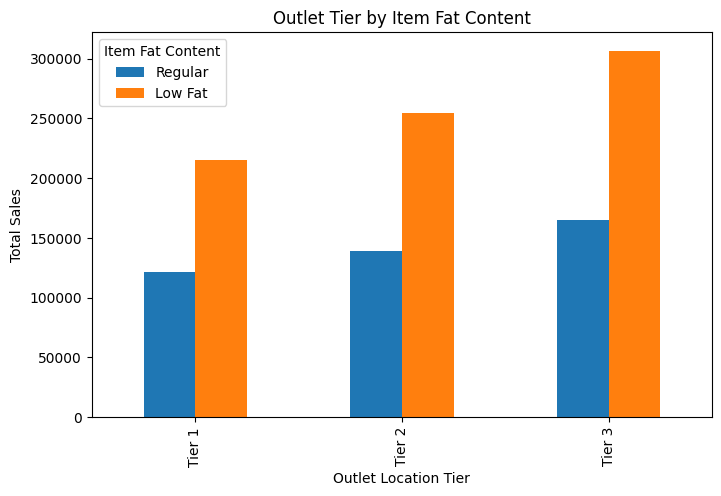

In [41]:
grouped=df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped= grouped[['Regular','Low Fat']]
ax=grouped.plot(kind='bar',figsize=(8,5),title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.show()

**Low Fat items consistently outperform Regular fat items in sales across all outlet tiers.The demand for Low Fat products increases from Tier 1 to Tier 3 outlets, peaking in Tier 3.Even in lower-tier (Tier 3) outlets, health-conscious purchasing behavior appears strong.This suggests a growing consumer preference for healthier options, even outside metro regions.Blinkit could expand its Low Fat product line across all outlet tiers, especially in Tier 3 cities where demand is surprisingly high.**


#### **Total Sales By Outlet Establishment**


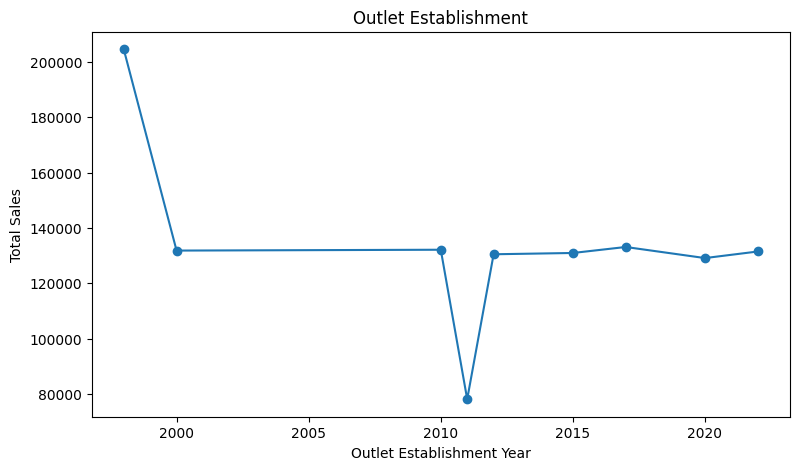

In [42]:
sales_by_year=df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index,sales_by_year.values,marker='o',linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')
plt.show()

**Outlets established before 2000 had the highest total sales, indicating strong, established customer bases. A sharp drop  is seen for outlets  established in 2011, which recorded the lowest sales possibly due to operational issues or market saturation. Sales from 2013 onwards show stability, with minor fluctuations, suggesting recent outlets are performing consistently but not exceptionally. Older outlets are more profitable, so Blinkit may benefit from investing in long-term customer retention and brand loyalty. For newer outlets, performance optimization strategies should be explored.**


#### **Sales By Outlet Size**


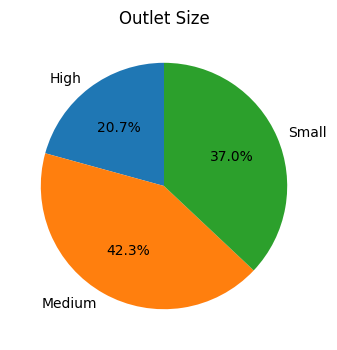

In [43]:
sales_by_size=df.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(4,4))
plt.pie(sales_by_size,labels=sales_by_size.index, autopct='%1.1f%%',startangle=90)
plt.title('Outlet Size')
plt.show()

**Medium-sized outlets form the largest share, making up 42.3% of all outlets.
Small outlets come next with 37.0%, indicating strong presence in compact or neighborhood locations.
High-sized outlets represent only 20.7%, suggesting limited investment in large-format stores.
Blinkit appears to focus more on medium and small outlets, likely due to their cost-effectiveness and adaptability in urban areas. High-sized outlets are less common, possibly due to higher operational costs.**

#### **Sales By Outlet Location**


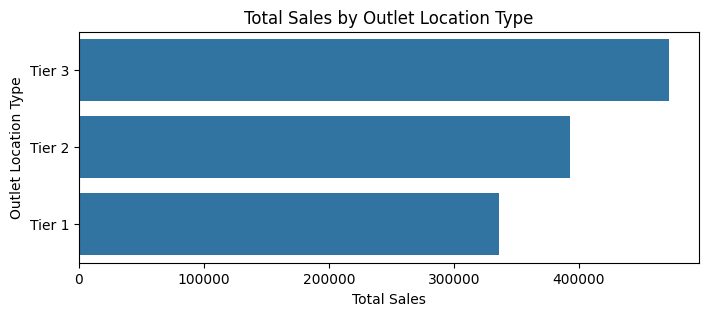

In [44]:
sales_by_location=df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location=sales_by_location.sort_values('Sales',ascending=False)
plt.figure(figsize=(8,3))
ax=sns.barplot(x='Sales',y='Outlet Location Type',data=sales_by_location)
plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.show()

**Tier 3 cities contribute the highest total sales, outperforming Tier 2 and Tier 1 locations.Tier 2 cities rank second in total sales, showing moderate demand.Tier 1 cities have the lowest total sales among the three.This suggests that Blinkit’s demand is strongest in Tier 3 locations, possibly due to fewer local competitors, rising online shopping adoption. Lower sales in Tier 1 cities may be due to high competition or market saturation.**




#### **Outlet by highest average item sales**


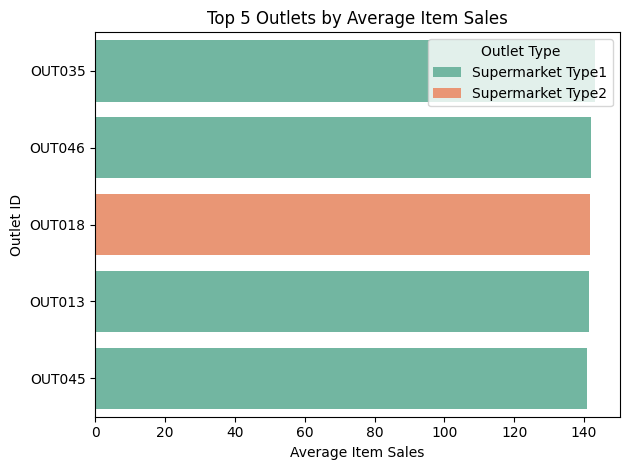

In [50]:





# Group by Outlet_Identifier and calculate mean sales
avg_sales = df.groupby('Outlet Identifier')['Sales'].mean().reset_index()

# Merge with unique outlet info (type, location, year)
outlet_info = df[['Outlet Identifier', 'Outlet Type', 'Outlet Location Type', 'Outlet Establishment Year']].drop_duplicates()

# Combine average sales with outlet info
avg_sales_full = pd.merge(avg_sales, outlet_info, on='Outlet Identifier')

# Sort by average sales
avg_sales_full = avg_sales_full.sort_values(by='Sales', ascending=False)

# Plot top 5 outlets by average sales, colored by Outlet_Type

top5 = avg_sales_full.head(5)

sns.barplot(
    data=top5,
    x= 'Sales',
    y='Outlet Identifier',
    hue='Outlet Type',
    palette='Set2'
)

plt.title('Top 5 Outlets by Average Item Sales')
plt.xlabel('Average Item Sales')
plt.ylabel('Outlet ID')
plt.legend(title='Outlet Type')
plt.tight_layout()
plt.show()





#### **Correlation between Item Visibility and Sales**


Correlation between Item Visibility and Sales: -0.0013


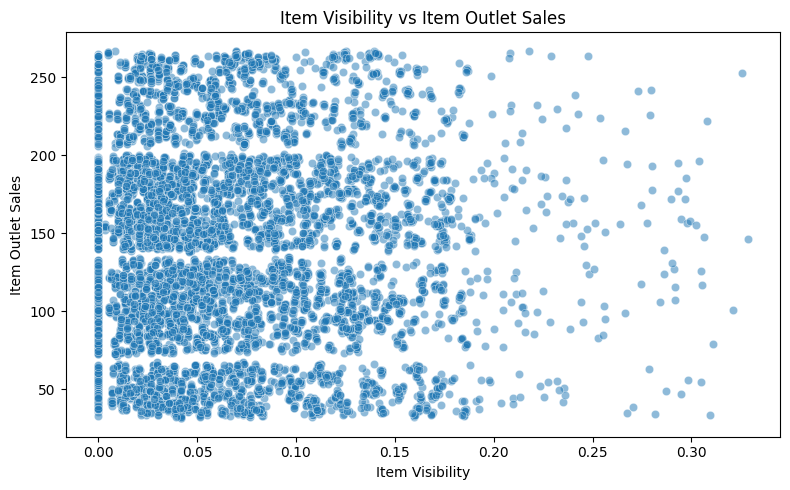

In [51]:

# Basic correlation
correlation = df['Item Visibility'].corr(df['Sales'])
print(f"Correlation between Item Visibility and Sales: {correlation:.4f}")
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Item Visibility', y='Sales', data=df, alpha=0.5)
plt.title('Item Visibility vs Item Outlet Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.tight_layout()
plt.show()



**The correlation between Item Visibility and Sales is -0.0013, indicating almost no linear relationship.The scatter plot shows a dense cloud of points with no clear trend.Sales are spread across all visibility levels, even for products with very low visibility.This suggests that visibility is not a strong predictor of sales in this dataset.Many items have a visibility of 0.00, which could be a data quality issue.**


#### **Sales distribution across different rating levels**


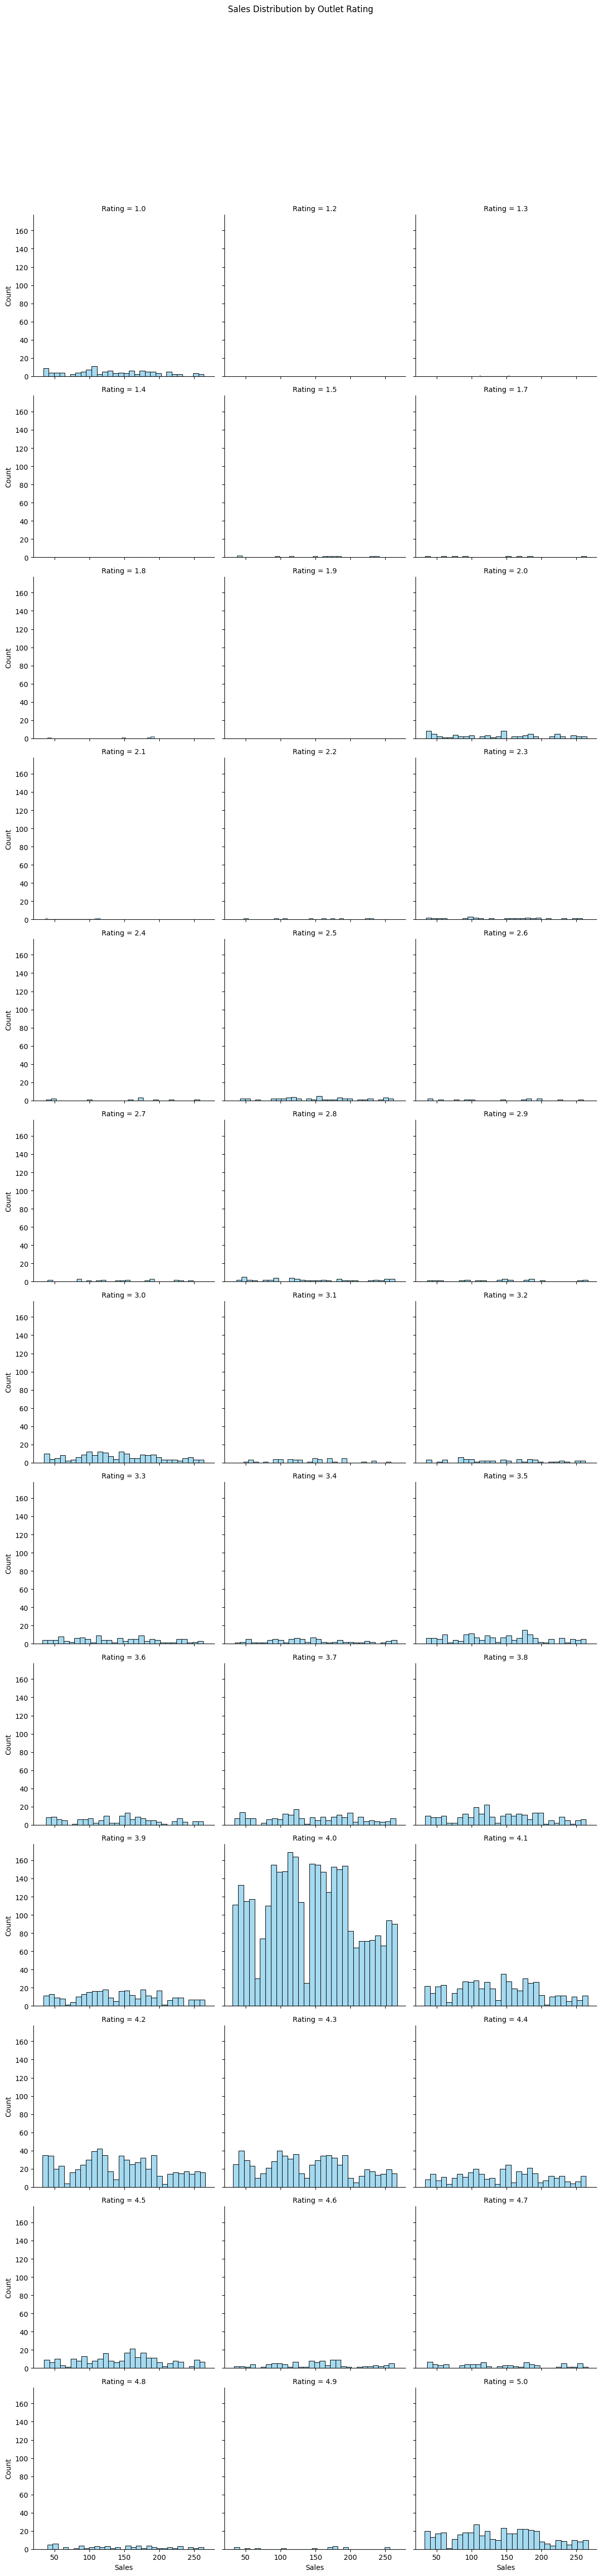

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
1.0,114.0,130.971691,59.925973,34.0532,93.91860,125.5033,177.68700,263.6594
1.2,1.0,223.540400,NaN,223.5404,223.54040,223.5404,223.54040,223.5404
1.3,2.0,133.075800,30.011592,111.8544,122.46510,133.0758,143.68650,154.2972
1.4,1.0,172.839600,NaN,172.8396,172.83960,172.8396,172.83960,172.8396
1.5,11.0,146.593945,67.514812,37.9506,105.59510,160.6578,182.79500,240.9196
1.7,8.0,128.482300,77.377175,33.1558,69.65770,123.2717,171.65995,264.3910
1.8,5.0,150.696080,64.740937,39.7164,146.87340,183.8266,190.61620,192.4478
1.9,2.0,53.165300,4.802811,49.7692,51.46725,53.1653,54.86335,56.5614
2.0,74.0,137.773373,69.922119,34.6190,76.21635,144.4470,186.69110,264.7568


In [67]:
g = sns.FacetGrid(df, col='Rating', col_wrap=3, height=4)
g.map(sns.histplot, 'Sales', bins=30, color="skyblue")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Sales Distribution by Outlet Rating")
plt.show()
df.groupby('Rating')['Sales'].describe()




**The rating values range from 1.0 to 5.0, in 0.1 increments.Most frequent ratings:4.0 has the highest count (3339 entries).
Ratings between 4.0 to 5.0 dominate the dataset.Low ratings (1.0 to 2.0) are rare, suggesting customers are generally satisfied or products with poor performance are fewer.Ratings around 4.5–4.6 show the highest average and median values, suggesting an optimal zone.
Ratings of 5.0 do not guarantee the highest performance.**

#### **Sales by Weight Category across Outlet Sizes**


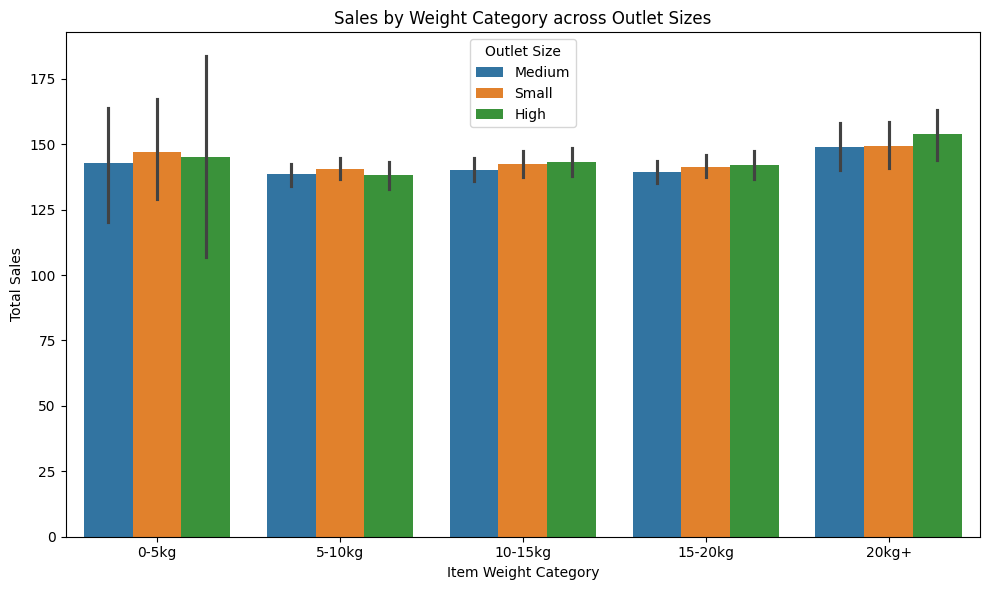

In [57]:
df.groupby('Outlet Size')['Item Weight'].mean()
df['Weight_Category'] = pd.cut(df['Item Weight'], bins=[0, 5, 10, 15, 20, df['Item Weight'].max()],
                               labels=['0-5kg', '5-10kg', '10-15kg', '15-20kg', '20kg+'])

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Weight_Category', y='Sales', hue='Outlet Size')
plt.title('Sales by Weight Category across Outlet Sizes')
plt.ylabel('Total Sales')
plt.xlabel('Item Weight Category')
plt.legend(title='Outlet Size')
plt.tight_layout()
plt.show()


**Total sales are fairly consistent across different item weight categories and outlet sizes.Heavier items (20kg+) show slightly higher sales in High outlet size locations. Lighter items (0–5kg) see good performance across all outlet sizes, especially in Small outlets.
Overall, outlet size doesn't drastically affect sales patterns by item weight, but small variations exist.**